In [24]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', 500)

In [2]:
path = os.getcwd()
path = path + '\\dataset\\'
        

In [3]:
case = pd.read_csv(path+'Case.csv')
p_info  = pd.read_csv(path+'PatientInfo.csv')
p_route = pd.read_csv(path + 'PatientRoute.csv')
region = pd.read_csv(path + 'Region.csv')
s_trend = pd.read_csv(path + 'SearchTrend.csv')
time = pd.read_csv(path + 'Time.csv')
time_age = pd.read_csv(path + 'TimeAge.csv')
time_gender = pd.read_csv(path + 'TimeGender.csv')
time_province = pd.read_csv(path + 'TimeProvince.csv')
weather = pd.read_csv(path + 'Weather.csv')

### 01. CASE

In [4]:
case.tail()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
76,6100004,Gyeongsangnam-do,Changwon-si,True,Hanmaeum Changwon Hospital,7,35.22115,128.6866
77,6100005,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008
78,6100006,Gyeongsangnam-do,from other city,True,Onchun Church,2,-,-
79,6100007,Gyeongsangnam-do,-,False,etc,19,-,-
80,7000001,Jeju-do,-,False,etc,4,-,-


In [5]:
coords = {
'Seoul' : (37.5652894,126.8494636),
'Busan' : (35.1205193,128.7635929),
'Daegu' : (35.8798688,128.4966594),
'Gwangju': (35.1768202,126.7737594),
'Incheon' : (37.4647398,126.5342636),
'Daejeon' : (35.8798688,128.4966594),
'Ulsan' : (35.5622483,129.2114134),
'Sejong' : (35.5626449,129.2114127),
'Gyeonggi-do' :(37.5951933,125.9746232) ,
'Gangwon-do':(37.8633717,127.1264767),
'Chungcheongbuk-do':(36.6371933,127.4064231),
'Chungcheongnam-do':(36.537139,126.2333525),
'Jeollabuk-do':(35.7273992,126.3695416),
'Jeollanam-do':(34.6932562,125.3767009),
'Gyeongsangbuk-do':(36.5566137,128.7243617),
'Gyeongsangnam-do':(35.1786324,127.2697352),
'Jeju-do':(33.4537345,126.5189802)
}

In [7]:
case1 = case.copy()
case1.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [8]:
coords

{'Busan': (35.1205193, 128.7635929),
 'Chungcheongbuk-do': (36.6371933, 127.4064231),
 'Chungcheongnam-do': (36.537139, 126.2333525),
 'Daegu': (35.8798688, 128.4966594),
 'Daejeon': (35.8798688, 128.4966594),
 'Gangwon-do': (37.8633717, 127.1264767),
 'Gwangju': (35.1768202, 126.7737594),
 'Gyeonggi-do': (37.5951933, 125.9746232),
 'Gyeongsangbuk-do': (36.5566137, 128.7243617),
 'Gyeongsangnam-do': (35.1786324, 127.2697352),
 'Incheon': (37.4647398, 126.5342636),
 'Jeju-do': (33.4537345, 126.5189802),
 'Jeollabuk-do': (35.7273992, 126.3695416),
 'Jeollanam-do': (34.6932562, 125.3767009),
 'Sejong': (35.5626449, 129.2114127),
 'Seoul': (37.5652894, 126.8494636),
 'Ulsan': (35.5622483, 129.2114134)}

In [9]:
for i in case1.index:
    if case1.loc[i,'latitude'] == '-':
        case1.loc[i,'latitude'] = coords[case1.loc[i,'province']][0]
    if case1.loc[i,'longitude'] == '-':
        case1.loc[i,'longitude'] = coords[case1.loc[i,'province']][1]

In [10]:
case1

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
5,1000006,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377
6,1000007,Seoul,from other city,True,Shincheonji Church,6,37.5653,126.849
7,1000008,Seoul,-,False,etc,65,37.5653,126.849
8,1100001,Busan,Dongnae-gu,True,Onchun Church,34,35.21628,129.0771
9,1100002,Busan,from other city,True,Shincheonji Church,8,35.1205,128.764


In [11]:
import folium


### 인사이트1
- 대구에 압도적인 감염자 수
- 전국적으로 퍼졌지만 강원지역은 비교적 감염 사례 적음
- 서해안 섬까지 감염 발발

In [43]:
group_infection = case1.query('group == True')
ind_infection = case1.query('group == False')

In [68]:
map_osm = folium.Map(location = [35.22115, 128.6866], zoom_start= 6.8)
for item in group_infection.index:
    lat = group_infection.loc[item, 'latitude']
    lng = group_infection.loc[item, 'longitude']
    folium.CircleMarker([lat,lng], radius = (group_infection.loc[item, 'confirmed'])/100, color = 'red',fill = True).add_to(map_osm)

for item in ind_infection.index:
    lat = ind_infection.loc[item, 'latitude']
    lng = ind_infection.loc[item, 'longitude']
    folium.CircleMarker([lat,lng], radius = (ind_infection.loc[item, 'confirmed'])/100, color = 'darkred',fill = True).add_to(map_osm)
    
map_osm

In [78]:
a = group_infection.groupby('province').sum()['confirmed'].reset_index().sort_values('confirmed', ascending = False)
a

,province,confirmed
3,Daegu,4361
8,Gyeongsangbuk-do,823
14,Seoul,153
2,Chungcheongnam-do,112
7,Gyeonggi-do,111
9,Gyeongsangnam-do,66
0,Busan,59
13,Sejong,37
1,Chungcheongbuk-do,21
5,Gangwon-do,21


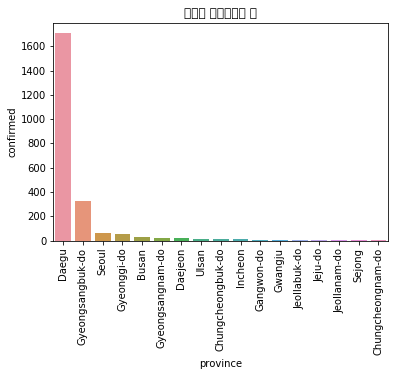

In [82]:
sns.barplot(x = a.province, y = a.confirmed)
plt.xticks(rotation=90)
plt.title('지역별 그룹감염자 수')
plt.show()


In [80]:
a = ind_infection.groupby('province').sum()['confirmed'].reset_index().sort_values('confirmed', ascending = False)
a

,province,confirmed
3,Daegu,1705
8,Gyeongsangbuk-do,322
15,Seoul,65
7,Gyeonggi-do,53
0,Busan,32
9,Gyeongsangnam-do,19
4,Daejeon,18
16,Ulsan,12
1,Chungcheongbuk-do,10
10,Incheon,10


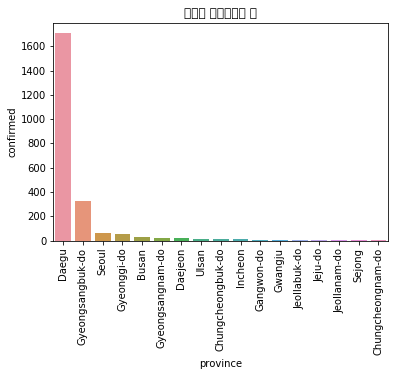

In [83]:
sns.barplot(x = a.province, y = a.confirmed)
plt.xticks(rotation=90)
plt.title('지역별 개인감염자 수')
plt.show()

### 02. P_INFO

In [84]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
patient_id            2218 non-null int64
global_num            1314 non-null float64
sex                   2073 non-null object
birth_year            1764 non-null float64
age                   1957 non-null object
country               2218 non-null object
province              2218 non-null object
city                  2153 non-null object
disease               19 non-null object
infection_case        1163 non-null object
infection_order       42 non-null float64
infected_by           469 non-null float64
contact_number        411 non-null float64
symptom_onset_date    193 non-null object
confirmed_date        2077 non-null object
released_date         223 non-null object
deceased_date         32 non-null object
state                 2130 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 312.0+ KB


In [86]:
p_info.tail(10)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2208,6102000080,NaN,female,1969.0,50s,Korea,Gyeongsangnam-do,Geochang-gun,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06,NaN,NaN,released
2209,6102000081,NaN,female,1947.0,70s,Korea,Gyeongsangnam-do,Geochang-gun,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06,NaN,NaN,isolated
2210,6102000082,NaN,male,1963.0,50s,Korea,Gyeongsangnam-do,Geochang-gun,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-07,NaN,NaN,released
2211,6101000083,NaN,male,1992.0,20s,Korea,Gyeongsangnam-do,Geoje-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-10,NaN,NaN,released
2212,6101000084,NaN,male,1971.0,40s,Korea,Gyeongsangnam-do,Geoje-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
2213,6100000085,NaN,male,1990.0,30s,Korea,Gyeongsangnam-do,Changwon-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN
2214,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated
2215,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released
2216,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released
2217,7000000004,5534.0,male,1974.0,40s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,74.0,NaN,2020-03-04,NaN,NaN,isolated


In [ ]:
### 감염자 연령별 분포

In [ ]:
### 완치

In [ ]:
### 사망

In [90]:
deceased = p_info.query('state == "deceased"')

In [112]:
a = deceased.groupby(['patient_id','confirmed_date']).count().reset_index()
b = deceased.groupby(['patient_id','confirmed_date']).count().reset_index()

In [113]:
a

,patient_id,confirmed_date,deceased_date,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,released_date,state
0,1200000038,2020-02-18,2020-02-23,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
1,1200000114,2020-02-21,2020-02-26,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1
2,1200000620,2020-02-24,2020-03-02,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
3,1200000901,2020-02-25,2020-03-04,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
4,1200001064,2020-02-26,2020-03-01,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
5,1200001288,2020-02-27,2020-03-02,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1
6,1200001443,2020-02-27,2020-02-27,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
7,1200001921,2020-02-28,2020-03-05,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1
8,1200002085,2020-02-28,2020-03-04,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1
9,1200002289,2020-02-28,2020-03-05,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1


In [110]:

fig = go.Figure()

fig.add_trace(go.Line(x = a.confirmed_date ,y = a['patient_id'], mode = 'lines', name = '사망자별확진일', line = dict(color = 'green')))
fig.add_trace(go.Line(x = b.deceased_date ,y = b['patient_id'], mode = 'lines', name = '사망자별사망일b', line = dict(color = 'darkred')))

# fig.add_trace(go.Line(x = a1.date, y = a1['flu'], mode = 'lines', name = '독감', line = dict(color = 'forestgreen')))
# fig.add_trace(go.Line(x = a1.date, y = a1['pneumonia'], mode = 'lines', name = '폐렴', line = dict(color = 'orangered')))


fig.update_layout(barmode = 'overlay')

In [41]:
p_route.tail()

,patient_id,global_num,date,province,city,latitude,longitude
170,1200000031,31,2020-02-09,Daegu,Nam-gu,35.83982,128.5666
171,1200000031,31,2020-02-15,Daegu,Dong-gu,35.88241,128.6621
172,1200000031,31,2020-02-16,Daegu,Nam-gu,35.83982,128.5666
173,1200000031,31,2020-02-17,Daegu,Suseong-gu,35.84473,128.6123
174,1200000031,31,2020-02-18,Daegu,Seo-gu,35.85959,128.5406


### 03. P_ROUTE

### 04. REGION

### 05. SEARCH_TREND

In [32]:
s_trend.tail(15)

,date,cold,flu,pneumonia,coronavirus,YYmm
1446,2020-03-02,0.88160,0.13345,0.44080,60.86853,2020-03
1447,2020-03-03,0.67934,0.11917,0.39853,47.17367,2020-03
1448,2020-03-04,0.82579,0.10790,0.35671,39.84053,2020-03
1449,2020-03-05,0.64916,0.09745,0.31726,33.24218,2020-03
1450,2020-03-06,0.58625,0.09163,0.28071,29.61647,2020-03
1451,2020-03-07,0.71743,0.07690,0.22762,26.90492,2020-03
1452,2020-03-08,0.58752,0.06717,0.20553,26.49020,2020-03
1453,2020-03-09,0.45435,0.09263,0.23962,29.79228,2020-03
1454,2020-03-10,0.46934,0.09108,0.28635,28.49514,2020-03
1455,2020-03-11,0.70143,0.08945,0.30208,24.02346,2020-03


In [33]:
s_trend['YYmm'] = s_trend.date.apply(lambda x: x[0:7])

In [34]:
df = s_trend.groupby('YYmm').mean()[['cold','flu','pneumonia','coronavirus']]

In [35]:
a1 = s_trend.query("date < '2018-01-01'")
a2 = s_trend.query("date >= '2018-01-01'")

In [36]:
a2

,date,cold,flu,pneumonia,coronavirus,YYmm
655,2018-01-01,0.23781,0.98397,0.14826,0.00563,2018-01
656,2018-01-02,0.29753,1.61431,0.24126,0.01181,2018-01
657,2018-01-03,0.27862,1.51522,0.22281,0.01536,2018-01
658,2018-01-04,0.27699,1.57331,0.21526,0.01681,2018-01
659,2018-01-05,0.28399,1.95157,0.20935,0.01309,2018-01
660,2018-01-06,0.23062,1.53404,0.16935,0.00718,2018-01
661,2018-01-07,0.22999,1.31177,0.14972,0.00709,2018-01
662,2018-01-08,0.30426,2.07148,0.23253,0.01118,2018-01
663,2018-01-09,0.26117,1.63040,0.20908,0.01381,2018-01
664,2018-01-10,0.23644,1.31050,0.18899,0.01690,2018-01


In [37]:
### 2018년 이전 검색 추이
from sklearn import preprocessing


fig = go.Figure()

fig.add_trace(go.Line(x = a1.date ,y = a1['coronavirus'], mode = 'lines', name = '코로나', line = dict(color = 'darkred')))
fig.add_trace(go.Line(x = a1.date, y = a1['cold'], mode = 'lines', name = '감기', line = dict(color = 'orange')))
fig.add_trace(go.Line(x = a1.date, y = a1['flu'], mode = 'lines', name = '독감', line = dict(color = 'forestgreen')))
fig.add_trace(go.Line(x = a1.date, y = a1['pneumonia'], mode = 'lines', name = '폐렴', line = dict(color = 'orangered')))


fig.update_layout(barmode = 'overlay')

In [38]:
fig = go.Figure()

fig.add_trace(go.Line(x = a2.date ,y = a2['coronavirus'], mode = 'lines', name = '코로나', line = dict(color = 'darkred')))
fig.add_trace(go.Line(x = a2.date, y = a2['cold'], mode = 'lines', name = '감기', line = dict(color = 'orange')))
fig.add_trace(go.Line(x = a2.date, y = a2['flu'], mode = 'lines', name = '독감', line = dict(color = 'forestgreen')))
fig.add_trace(go.Line(x = a2.date, y = a2['pneumonia'], mode = 'lines', name = '폐렴', line = dict(color = 'orangered')))


fig.update_layout(barmode = 'overlay')

In [39]:
from sklearn import preprocessing


fig = go.Figure()

# fig.add_trace(go.Line(x = s_trend.date ,y = s_trend['coronavirus'], mode = 'lines', name = '코로나', line = dict(color = 'darkred')))
fig.add_trace(go.Line(x = s_trend.date, y = s_trend['cold'], mode = 'lines', name = '감기', line = dict(color = 'orange')))
fig.add_trace(go.Line(x = s_trend.date, y = s_trend['flu'], mode = 'lines', name = '독감', line = dict(color = 'forestgreen')))
fig.add_trace(go.Line(x = s_trend.date, y = s_trend['pneumonia'], mode = 'lines', name = '폐렴', line = dict(color = 'orangered')))
fig.add_trace(go.Line(x = s_trend.date ,y = s_trend['coronavirus'], mode = 'lines', name = '코로나', line = dict(color = 'darkred')))


fig.update_layout(barmode = 'overlay')